In [ ]:
!pip install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 121.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 83.9 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.4
    Uninstalling tokenizers-0.21.4:
      Successfully uninstalled tokenizers-0.21.4
  Attempting uninstall: transformers
    Found existing installation: transformers 4.55.4
    Uninstalling transformers-4.55.4:
      Successfully uninstalled transformers-4.55.4


In [ ]:
!pip install transformers datasets scikit-learn


In [ ]:
import transformers
print(transformers.__version__)


4.55.4


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving True.csv to True.csv


In [ ]:
uploaded = files.upload()

Saving Fake.csv to Fake.csv


In [ ]:
import pandas as pd
fake_df = pd.read_csv("Fake.csv")
true_df = pd.read_csv("True.csv")

In [ ]:
fake_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [ ]:
true_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
fake_df["label"] = 1
true_df["label"] = 0

In [ ]:
df = pd.concat([fake_df, true_df]).reset_index(drop=True)
df = df[["text", "label"]]

In [ ]:
print(df.head())
print("Class distribution:\n", df['label'].value_counts())

                                                text  label
0  Donald Trump just couldn t wish all Americans ...      1
1  House Intelligence Committee Chairman Devin Nu...      1
2  On Friday, it was revealed that former Milwauk...      1
3  On Christmas day, Donald Trump announced that ...      1
4  Pope Francis used his annual Christmas Day mes...      1
Class distribution:
 label
1    23481
0    21417
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

train_texts, test_texts, train_labels, test_labels = train_test_split(
    df["text"], df["label"], test_size=0.2, random_state=42, stratify=df["label"]
)


In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=256)
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=256)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
import torch

class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels.iloc[idx])
        return item

train_dataset = NewsDataset(train_encodings, train_labels)
test_dataset = NewsDataset(test_encodings, test_labels)

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=2
)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, f1_score

training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=50
    # 🚑 No evaluation_strategy here
)

In [ ]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds, average="macro")
    }

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()


Step,Training Loss
50,0.299300
100,0.020100
150,0.016700
200,0.001900
250,0.007100
300,0.001000
350,0.000700
400,0.000500
450,0.005600
500,0.000600


TrainOutput(global_step=6735, training_loss=0.0035148997773264577, metrics={'train_runtime': 3171.5578, 'train_samples_per_second': 33.975, 'train_steps_per_second': 2.124, 'total_flos': 7136946037389312.0, 'train_loss': 0.0035148997773264577, 'epoch': 3.0})

In [ ]:
eval_results = trainer.evaluate()
print("Evaluation Results:", eval_results)

Evaluation Results: {'eval_loss': 0.0020869006402790546, 'eval_model_preparation_time': 0.0014, 'eval_accuracy': 0.9997772828507795, 'eval_f1': 0.9997768176130171, 'eval_runtime': 61.2863, 'eval_samples_per_second': 146.525, 'eval_steps_per_second': 9.17, 'epoch': 3.0}


In [ ]:
preds = trainer.predict(test_dataset)
y_true = preds.label_ids
y_pred = preds.predictions.argmax(-1)


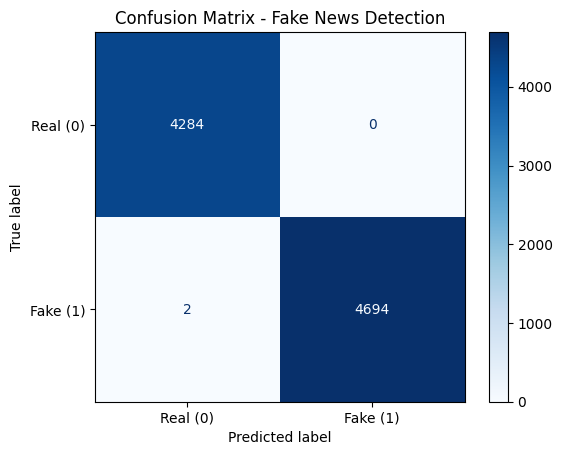

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, classification_report

import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real (0)", "Fake (1)"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Fake News Detection")
plt.show()


In [ ]:
print("✅ Accuracy:", accuracy_score(y_true, y_pred))
print("✅ F1 Score:", f1_score(y_true, y_pred, average="macro"))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

✅ Accuracy: 0.9997772828507795
✅ F1 Score: 0.9997768176130171

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4284
           1       1.00      1.00      1.00      4696

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [ ]:
from transformers import pipeline

# Save model and tokenizer
model.save_pretrained("./fake-news-model")
tokenizer.save_pretrained("./fake-news-model")

# Load pipeline
fake_news_classifier = pipeline(
    "text-classification",
    model="./fake-news-model",
    tokenizer="./fake-news-model",
    device=0 if torch.cuda.is_available() else -1  # use GPU if available
)

# Test with examples
print(fake_news_classifier("NASA confirms discovery of a new planet."))
print(fake_news_classifier("Aliens landed in New York City, media is hiding the truth!"))




Device set to use cuda:0


[{'label': 'LABEL_1', 'score': 0.9998693466186523}]
[{'label': 'LABEL_1', 'score': 0.9999691247940063}]


In [ ]:
print(fake_news_classifier(" Trump campaign adviser George Papadopoulos told an Australian diplomat in May 2016 that Russia had political dirt on Democratic presidential candidate Hillary Clinton, the New York Times"))

[{'label': 'LABEL_1', 'score': 0.9999794960021973}]


In [ ]:
print(fake_news_classifier("NASA confirms discovery of new planet."))
print(fake_news_classifier("Aliens landed in New York, media hides truth."))


[{'label': 'LABEL_1', 'score': 0.9999074935913086}]
[{'label': 'LABEL_1', 'score': 0.999971866607666}]
